# GEM_MODEL 
Using a normal data set from Kaggle. To predict the price of Gem Stones, based on just 2 features. This Project is to understand the basic work flow of Neural Networks, using Keras & Tensor Flow.
Have Performed 9 Basic steps of the Neural Network Modelling Workflow.
STEPS:
* 1) Imports 
* 2) EDA
* 3) Train the Model
* 4) Feature Engineering |MinMaxScaler
* 5) Develop NEURAL NETWORK Model using TF & Keras
* 6) Evaluation & Predictions | W.R.T. COST f
* 7) Quantitative Evaluation (MAE, MSE, RMSE)
* 8) Run MODEL (On UNSEEN data)
* 9) Save Model | For later use | For direct predictions
## A) Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


* Let's predict the prices on basis of these two features using Keras and TF
* Historical Data Set -> Supervised Learning Example

## B) EDA

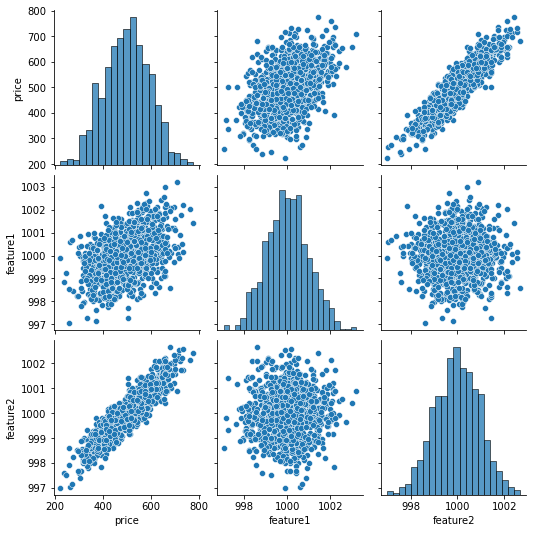

In [4]:
# EDA || Pairplot || To check and understand the features
sns.pairplot(df)

<AxesSubplot:xlabel='feature1', ylabel='price'>

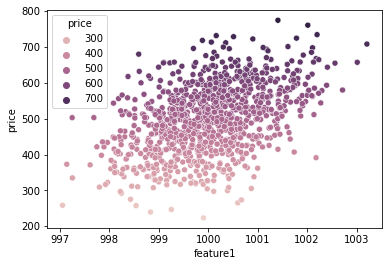

In [7]:
sns.scatterplot(x = 'feature1',y = 'price', data = df, hue='price' )

<AxesSubplot:xlabel='feature2', ylabel='price'>

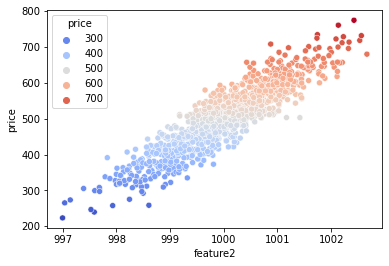

In [9]:
sns.scatterplot(x = 'feature2',y = 'price', data = df, hue='price',palette='coolwarm' )

## B-2) Train the model

In [10]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['feature1','feature2']].values #For TF we need to pass NUMPY Arrays > Use '.values' > Gives Result in NUMPY array form.
y = df['price'].values #X -Uppercase (coz features = 2D) || y-LowerCase (coz features = 1D)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

## C) Feature-Engineering

### Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)
##### Now to avoid any explodings in Neural Networks (as it consists of Weights & Biases) -> SCALE the features
* Used MinMaxScaler | This works on Std. Deviation/ Max /Min and scales the feature values such that > Gradient doesn't explode.
* We only SCALE -> TRAINING Data (Coz We can't already scale the test data as per our needs -> To prevent DATA LEAKAGE of Predictions)

* STEP-1 : Scale the Features using MinMaxScaler | 
* STEP-2: fit the Scaler to TRAINING DATA 
* STEP-3: Transform the Training & Test Data for features -> using SCALER.TRANSFORM

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train) # Only scale features | Training Data | Value ranges b/w (0 to 1) after Scaling

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train) #Transform the X_train into its SCALED values

In [19]:
X_test = scaler.transform(X_test) #Transformed the X_test Data to lower the values w.r.t. scaled values of X_train

In [20]:
X_train.max()

1.0

In [21]:
X_test.min()

-0.014108392024525074

## D) Neural Network Model - using TF & Keras
 * Sequential model = Linear stack of layers in the model
*  Dense Layers = Gives regularly connected dense NN layer - > Normal Feed Forward Network

In [22]:
# Keras & Tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

#### Creating a Simple NN model
##### SYNTAX-1 (Way A): model = model_type([layer1_type(units, activation='type'), layer2_type(units, activation = 'type')..])
* units = Number of neurons in a layer

##### SYNTAX-1 ( Way B): 
        *   model = model_type() || Create Model seperately and then add layers accordingly
        *   model.add(layer_type(units, activation='type')).... goes on || Use this for HIDDEN and FINAL Output layer
##### SYNTAX-2 (Compile model) | Using G.D. & Cost Function
       * model.compile(optimizer='G.D._curve_type',loss='Cost_fun._type')
       * G.D. Curve type = rmsprop, adam, adagrad, adadelta, sgdnestrov
##### ADAM = Most Regressive Adaptive G.D. = Minimized the Cost f | Best Manner 
        * loss = Cost f = 'mse'(Regression), 'binary_crossentropy'(For Binary Class),'categorical_crossentropy'(For Multi Class)
##### SYNTAX-3 (Model Fit) | Using EPOCHS | Epochs = No of time model passes through the Data Set
      * model.fit(x=X_train, y=y_train, epochs = no. of passes)
##### SYNTAX-4 (Model History) | using HISTORY | gives history of changes in COST Fun.
      * model.history.history 
    
### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [23]:
model = Sequential() #Created a Empty Model

In [24]:
# Adding Layers - Seperately
model.add(Dense(4,activation='relu')) #Added Layer 1 
model.add(Dense(5,activation='relu'))
model.add(Dense(6,activation='relu'))#Added Layer 2
model.add(Dense(1)) #Added OUTPUT Layer || Predicts the price

model.compile(optimizer='adam',loss='mse') #We use Cost Function = mse | For Regression Problem

In [25]:
model.fit(x=X_train,y=y_train, epochs=250) #Model passes through training dataset by 250 times

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256459.6094
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256274.8750
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256049.1406
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255767.0000
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 255422.7031
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 254992.4531
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 254452.2344
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 253768.4531
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 252927.6562
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 251881.2344
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 250598.5312
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 2ms/step - loss: 659.0875
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 651.9707
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 644.7155
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 637.1627
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 630.0188
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 622.0201
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 614.8435
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 607.5565
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 600.2803
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 592.7644
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 585.4535
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 578.1622
Epoch 

In [26]:
# Check History of Cost Function | Training Daata
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

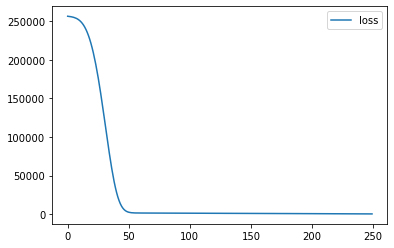

In [27]:
loss_df.plot() 

#### Conclusion: Initially the Loss is high, but with the weights & Biases being adjusted the loss declines || Gives Better Fit
* Moving Ahead will check it for OVERFITTING & UNDERFITTING

## E) Evaluation of Model & Predictions
* To check how well this model will work on "Unseen Data"

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [29]:
model.evaluate(X_test,y_test,verbose=0) #Gives value of COST f , for unseen TEST Data

268.3081359863281

In [30]:
model.evaluate(X_train,y_train,verbose=0) #Cost function for training set and test data set are quite near - Good Model

276.0184326171875

In [31]:
#predictions
test_predictions = model.predict(X_test)

In [32]:
test_predictions #Gives Output as Numpy Array

array([[423.44153],
       [605.4192 ],
       [579.58997],
       [561.81494],
       [389.62906],
       [568.19775],
       [513.43933],
       [468.93008],
       [542.68146],
       [459.39227],
       [595.65735],
       [544.77466],
       [434.8378 ],
       [426.06076],
       [630.1498 ],
       [450.57233],
       [510.7551 ],
       [634.42413],
       [637.3999 ],
       [557.6804 ],
       [363.38507],
       [456.31677],
       [403.86816],
       [401.38684],
       [557.82874],
       [593.8031 ],
       [529.18646],
       [442.4087 ],
       [631.0943 ],
       [431.386  ],
       [455.18466],
       [490.0171 ],
       [451.1784 ],
       [653.32654],
       [440.69666],
       [433.1156 ],
       [505.69214],
       [544.62714],
       [509.32013],
       [413.6719 ],
       [601.6378 ],
       [433.353  ],
       [589.78845],
       [458.46185],
       [504.04068],
       [572.25116],
       [644.58386],
       [495.01944],
       [351.85242],
       [490.11136],


In [33]:
#Convert NumPy Array to Pandas SERIES
test_predictions = pd.Series(test_predictions.reshape(300,))#Reshape the series based on col. inputs
#SYNTAX: df_name = pd.Series(df_name.reshape(col_inputs,)) || Reshapes Array ->> Series

In [34]:
test_predictions

0      423.441528
1      605.419189
2      579.589966
3      561.814941
4      389.629059
          ...    
295    525.930054
296    512.637146
297    594.016968
298    433.904541
299    427.499329
Length: 300, dtype: float32

In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y']) #Creates Data Frame with "TEST Values"

In [36]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [40]:
#Add "PREDICTIONS" to "pred_df"
pred_df['Model Predictions'] =test_predictions

In [41]:
pred_df #Shows the accuracy of the Model for "UNSEEN DATA Predictions"

,Test True Y,Predictions,Model Predictions
0,402.296319,423.441528,423.441528
1,624.156198,605.419189,605.419189
2,582.455066,579.589966,579.589966
3,578.588606,561.814941,561.814941
4,371.224104,389.629059,389.629059
...,...,...,...
295,525.704657,525.930054,525.930054
296,502.909473,512.637146,512.637146
297,612.727910,594.016968,594.016968
298,417.569725,433.904541,433.904541


In [46]:
pred_df.drop('Predictions',1) #To drop a column from the Data Frame - It drops the column Temporary
#SYNATX: df = df.drop('col.',1)

,Test True Y,Model Predictions
0,402.296319,423.441528
1,624.156198,605.419189
2,582.455066,579.589966
3,578.588606,561.814941
4,371.224104,389.629059
...,...,...
295,525.704657,525.930054
296,502.909473,512.637146
297,612.727910,594.016968
298,417.569725,433.904541


In [49]:
pred_df

,Test True Y,Predictions,Model Predictions
0,402.296319,423.441528,423.441528
1,624.156198,605.419189,605.419189
2,582.455066,579.589966,579.589966
3,578.588606,561.814941,561.814941
4,371.224104,389.629059,389.629059
...,...,...,...
295,525.704657,525.930054,525.930054
296,502.909473,512.637146,512.637146
297,612.727910,594.016968,594.016968
298,417.569725,433.904541,433.904541


In [50]:
#To delete the column permanently
del pred_df['Predictions']

In [51]:
pred_df

,Test True Y,Model Predictions
0,402.296319,423.441528
1,624.156198,605.419189
2,582.455066,579.589966
3,578.588606,561.814941
4,371.224104,389.629059
...,...,...
295,525.704657,525.930054
296,502.909473,512.637146
297,612.727910,594.016968
298,417.569725,433.904541


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

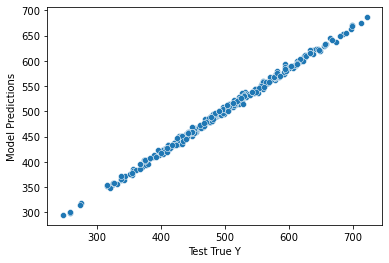

In [52]:
#Let's Plot True Y -> Model Predictions
sns.scatterplot(x ='Test True Y', y = 'Model Predictions', data = pred_df)

###### Conclusion: Model is performing really well

## F) Quantitative Evaluation
##### How to check Quantitatively that the model is working fine??
* Use mean_absolute_error, mean_squared_error || Compare them with Original Mean of the DF ||
* If it is <5% -- Model Performs well

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

##### SYNTAX: mean_absolute_error(df['Actual Value'],df['Predictions']) 
* Gives MAE based on Actual test values & Predictions
* Compare that with Mean of the original Data || MAError <5% of Actual Mean = Good

##### SYNTAX: mean_squared_error(df['Actual Value'],df['Predictions'])
* Should be same valued as COST FUNCTION (TEST Data)|| Coz COST F = MSE

In [55]:
#MAE
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

13.161125787668974

In [56]:
#Check original Mean
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


* Conclusion: That means the MAE is 2% of Actual Mean = Model performs well
* NOTE: MAE is a good metric to understand how well the model predicts, but only when we take "Original Mean" into Account

In [57]:
#MSE
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

268.3081238784293

In [58]:
#RMSE
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

16.380113671108308

## G) Model Run 
* Get Predictions

In [68]:
#Lets' Predict price for a newly founded Gem Stone || Given Feature values
new_gems = [[998,1000],[800,900]]

In [69]:
#Now as our prediction is based on SCALED Features > Scale the new_gem features and then predict
new_gems = scaler.transform(new_gems)

In [72]:
#Predict the price of Scaled values of "new_gem"
predicted_new_cost = model.predict(new_gems)

In [74]:
# Converted Array o/p to Series
predicted_new_gems = pd.Series(predicted_new_cost.reshape(2,))
predicted_new_gems

0    433.989746
1    396.664581
dtype: float32

# H) SAVE MODEL in Tensor Flow And Keras
* Using "load_model" from models in TF
##### SYNTAX: model.save('file_name.h5') || Extension should be 'h5'
* So once we save the model > We can directly LOAD it > use it for PREDICTIONS
* Use "load_model('model_name.h5')" to load the model directly for predictions

In [75]:
#SAVE MODEL in Tensor Flow And Keras
from tensorflow.keras.models import load_model

In [76]:
model.save('jay_gem_model.h5')

In [77]:
up_model = load_model('jay_gem_model.h5')

In [78]:
up_model.predict(new_gems)

array([[433.98975],
       [396.66458]], dtype=float32)

## Thank You!!